In [60]:
pip install ultralytics roboflow

In [61]:
from ultralytics import YOLO
from roboflow import Roboflow
import os

In [62]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FuEPKooafbiz1oEvPLdz")
project = rf.workspace("object-detect-dmjpt").project("ocean_waste")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


KeyboardInterrupt: 

In [ ]:
pip install yolov8

In [ ]:
import os
import yaml

# Original YAML file path
original_yaml_path = "C:\\Users\\Yashyashsvi\\Desktop\\Ocean_plastic\\Roboflow\\data.yaml"

# Load data from original YAML
with open(original_yaml_path, "r") as f:
    data_dict = yaml.safe_load(f)

# Update paths
data_dict["path"] = r"C:\Users\Yashyashsvi\Desktop\Ocean_plastic\Roboflow"
data_dict["train"] = os.path.join("C:\\Users\\Yashyashsvi\\Desktop\\Ocean_plastic\\Roboflow\\train\\images", "train")
data_dict["val"] = os.path.join("C:\\Users\\Yashyashsvi\\Desktop\\Ocean_plastic\\Roboflow\\valid\\images\\valid", "valid")
data_dict["test"] = os.path.join("C:\\Users\\Yashyashsvi\\Desktop\\Ocean_plastic\\Roboflow\\test\\images", "test")

# New YAML file path
new_yaml_path = "C:\\Users\\Yashyashsvi\\Desktop\\Ocean_plastic\\Roboflow\\updated_data.yaml"

# Write updated data to new YAML file
with open(new_yaml_path, "w") as f:
    yaml.safe_dump(data_dict, f)


In [ ]:
model = YOLO("yolov8n.pt")  # Load pre-trained YOLOv8n model

In [ ]:
import os
import yaml
from models import create_model
  # Replace your_module with the actual module name

# Load the data.yaml file to get the paths to train, val, and test directories
data_yaml_path = "C:\\Users\\Yashyashsvi\\Desktop\\Ocean_plastic\\Roboflow\\data.yaml"
with open(data_yaml_path, "r") as f:
    data_dict = yaml.safe_load(f)

# Now data_dict should contain the paths to train, val, and test directories
train_dir = data_dict["train"]
val_dir = data_dict["val"]
test_dir = data_dict["test"]

# Assuming you have a function to create the model object
model = create_model()

# You would typically use a data loader to load images from directories during training
# Here, we assume you have such a data loader, which we'll call `train_loader` and `val_loader`
# These loaders should load images and their corresponding labels from the specified directories

# Now you can train the model using the data loaders
model.train(train_loader=train_loader, val_loader=val_loader, epochs=100, imgsz=640)


In [ ]:
metrics = model.val(data=data)
print(metrics)


In [70]:
results = model.predict(source="C:\\Users\\Yashyashsvi\\Desktop\\Ocean_plastic\\Roboflow\\test\\images\\maxresdefhnjkault_jpg.rf.1692d8de461bca60b82886c4310b7e52.jpg", save=True)


image 1/1 C:\Users\Yashyashsvi\Desktop\Ocean_plastic\Roboflow\test\images\maxresdefhnjkault_jpg.rf.1692d8de461bca60b82886c4310b7e52.jpg: 640x640 (no detections), 342.7ms
Speed: 30.1ms preprocess, 342.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2



image 1/1 C:\Users\Yashyashsvi\Desktop\Ocean_plastic\Roboflow\test\images\maxresdefhnjkault_jpg.rf.1692d8de461bca60b82886c4310b7e52.jpg: 640x640 (no detections), 326.0ms
Speed: 16.3ms preprocess, 326.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


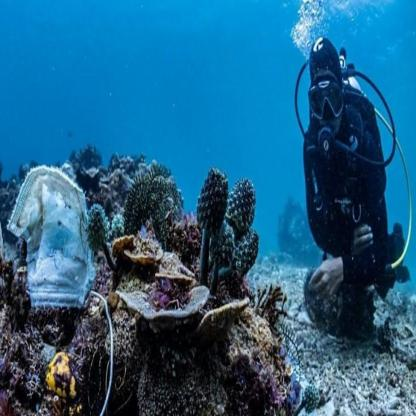

In [71]:
import cv2
from IPython.display import Image, display

# Perform object detection and save annotated image
results = model.predict(source="C:\\Users\\Yashyashsvi\\Desktop\\Ocean_plastic\\Roboflow\\test\\images\\maxresdefhnjkault_jpg.rf.1692d8de461bca60b82886c4310b7e52.jpg", save=True, save_crop=False)

# Iterate through the prediction results
for result in results:
    # Get the path of the annotated image
    annotated_image_path = result.path

    # Load the annotated image
    annotated_image = cv2.imread(annotated_image_path)

    # Convert BGR to RGB (if needed)
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    # Display the annotated image in the notebook
    display(Image(filename=annotated_image_path))